<a href="https://colab.research.google.com/github/MitaliGhotgalkar/sanctuarymanagement/blob/main/Assignment_8_Mitali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 8 - Decision Tree

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier

Loading the Boston Housing prices dataset

In [160]:
from sklearn.datasets import load_boston
feature_names = load_boston().feature_names


#Loading the boston housing prices data
data = load_boston()
feature_names = data.feature_names
X = data.data
y = data.target

Split the range of target values into three equal parts - low, mid, and high.
Reassign the target values into into three categorical values 0, 1, and 2, representing
low, mid and high range of values, respectively.

In [ ]:
from pandas.io.formats.format import DataFrameRenderer

data = load_boston()
X = data.data
y = data.target
#creating an empty int array to store the new target values 
new_y=np.empty(len(y), dtype=int)

#converting existing prices data into a dataframe
dataframe=pd.DataFrame(y)

#Splitting the range of target values using describe() values
df=dataframe.describe(percentiles =[0.333,0.666,0.999])
#Saving 33.3%, 66.6% and 99.9% value for splitting the target values into 3 categories (0,1, and 2)

#This represents the 33.3% value from the describe() function.
thirtyThree = df.values[4]
#This represents the 33.3% value from the describe() function.
sixtySix = df.values[6]
#This represents the 33.3% value from the describe() function.
ninetyNine = df.values[7]

#initializing the counter to 0
i = 0
for data in y:
  if (data <=thirtyThree):
    new_y[i] = 0
    i+=1
  elif(data <=sixtySix):
    new_y[i] = 1
    i+=1
  else:
    new_y[i] = 2
    i+=1


#This is the new array that consists of categorical values in form of 0,1,2
new_y


## Split the dataset into training and test sets (70, 30).

In [162]:
from sklearn.model_selection import train_test_split


# the train and test sets are split into 70% and 30%
colx_train, colx_test, coly_train, coly_test = train_test_split(X, np.array(new_y), 
                                                                test_size =0.3)
  
print("colx_train shape : ", colx_train.shape)
print("colx_test shape  : ", colx_test.shape)
print("coly_train shape : ", coly_train.shape)
print("coly_test shape  : ", coly_test.shape)

colx_train shape :  (354, 13)
colx_test shape  :  (152, 13)
coly_train shape :  (354,)
coly_test shape  :  (152,)


2. Using scikit-learn’s DecisionTreeClassifier, train a supervised learning model that can
be used to generate predictions for your data. A reference to how you can do that
can be found in the users manual at https://scikit-learn.org/stable/modules/
generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.

3. Report the tree depth, number of leaves, feature importance, train score, and test score
of the tree. Let the tree depth be Td.

In [163]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

decTreeClf = tree.DecisionTreeClassifier()
decTreeClf = decTreeClf.fit(colx_train, coly_train)
tree_depth=decTreeClf.get_depth()
print("Tree depth is as follows using max_depth",decTreeClf.tree_.max_depth)
print("Tree depth is as follows using get_depth",decTreeClf.get_depth())
print("Number of leaves",decTreeClf.tree_.n_leaves)
print("feature importance",decTreeClf.tree_.compute_feature_importances())
print("train score",decTreeClf.score(colx_train, coly_train))
print("test score",decTreeClf.score(colx_test, coly_test))

Tree depth is as follows using max_depth 10
Tree depth is as follows using get_depth 10
Number of leaves 64
feature importance [0.03540077 0.00423739 0.06469705 0.         0.06316382 0.19737723
 0.09611317 0.0505646  0.00723887 0.0320079  0.04816602 0.03656067
 0.36447252]
train score 1.0
test score 0.75


4. Show the visual output of the decision tree.

In [164]:
import graphviz 
dot_data = tree.export_graphviz(decTreeClf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("data")

'data.pdf'

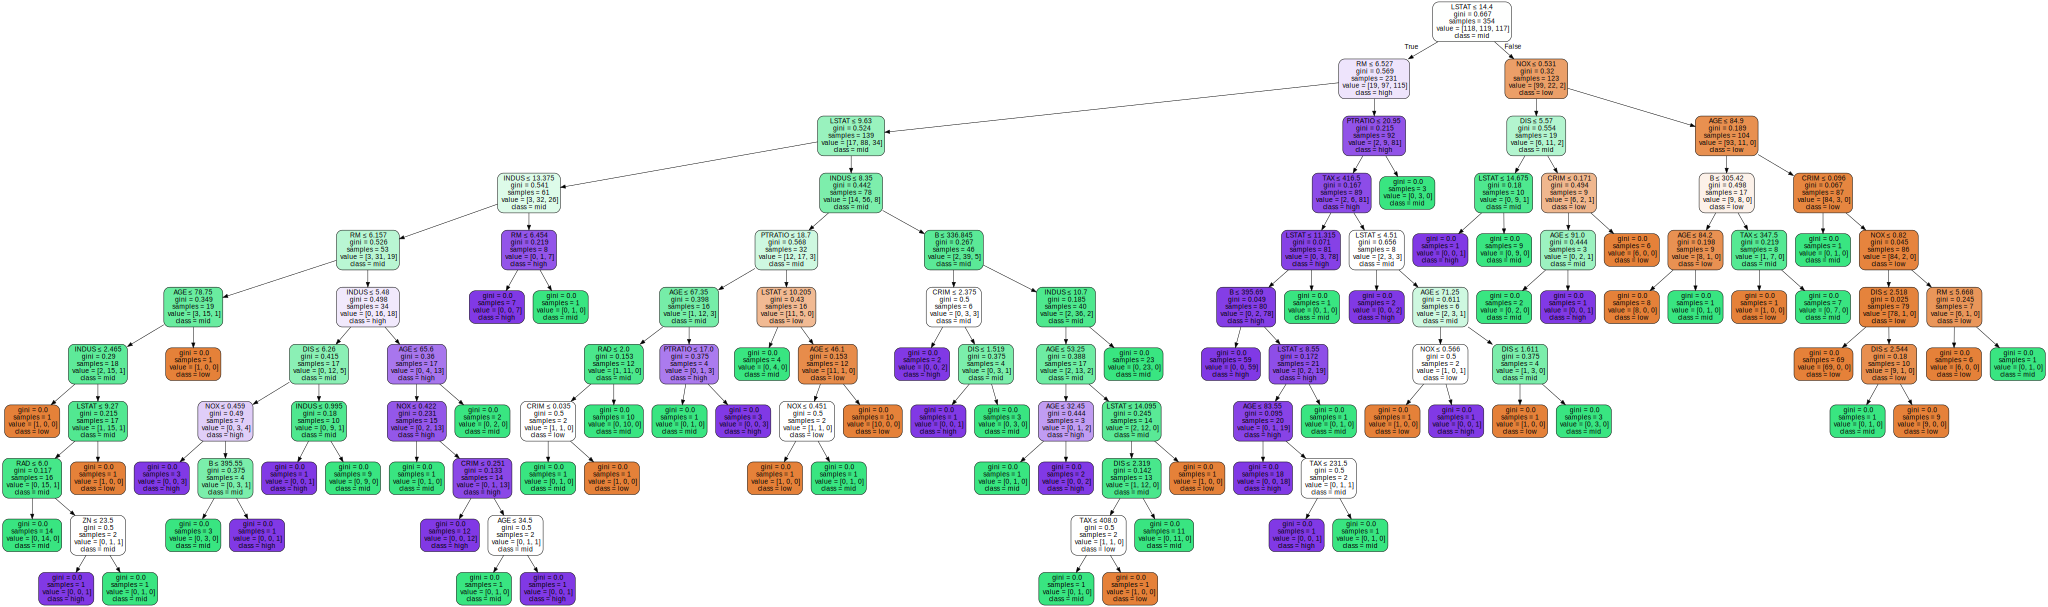

In [165]:
dot_data = tree.export_graphviz(decTreeClf, out_file=None, 
                     feature_names=load_boston().feature_names,  
                      class_names=['low','mid','high'],  
                      filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data) 
graph 

5. Next, Generate (Td-1) decision trees on the same training set using fixed tree depths
{1, 2, ...(T d −1)}. The tree depth can be set using max=d, where d is the depth of the
tree.
6. For each of the (Td-1) trees report, tree depth, number of leaves, feature importance,
train score, and test score of the tree

Depth 1
Tree depth is as follows using max_depth 1
Tree depth is as follows using get_depth 1
Number of leaves 2
feature importance [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
train score 0.6045197740112994
test score 0.5921052631578947
Depth 2
Tree depth is as follows using max_depth 2
Tree depth is as follows using get_depth 2
Number of leaves 4
feature importance [0.         0.         0.         0.         0.0808736  0.34294594
 0.         0.         0.         0.         0.         0.
 0.57618047]
train score 0.7711864406779662
test score 0.8223684210526315
Depth 3
Tree depth is as follows using max_depth 3
Tree depth is as follows using get_depth 3
Number of leaves 8
feature importance [0.         0.         0.         0.         0.06869025 0.29128221
 0.04060807 0.03214386 0.         0.         0.0370049  0.
 0.5302707 ]
train score 0.7909604519774012
test score 0.8026315789473685
Depth 4
Tree depth is as follows using max_depth 4
Tree depth is as follows using get_depth 4
Number o

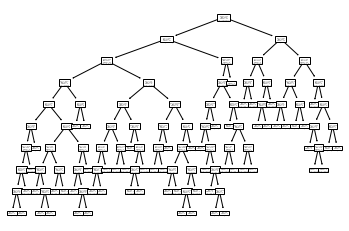

In [166]:
max_test_score = 0
highest_score_depth = 0
for i in range(1,tree_depth):
  print("Depth",i)
  decTreeClf = tree.DecisionTreeClassifier(max_depth=i)
  decTreeClf = decTreeClf.fit(colx_train, coly_train)
  print("Tree depth is as follows using max_depth",decTreeClf.tree_.max_depth)
  print("Tree depth is as follows using get_depth",decTreeClf.get_depth())
  print("Number of leaves",decTreeClf.tree_.n_leaves)
  print("feature importance",decTreeClf.tree_.compute_feature_importances())
  train_score = decTreeClf.score(colx_train, coly_train)
  test_score = decTreeClf.score(colx_test, coly_test)
  print("train score",train_score)
  print("test score",test_score)
  tree.plot_tree(decTreeClf)
  if test_score > max_test_score:
    max_test_score = test_score
    highest_score_depth = i

print(max_test_score)
print("Tree with highest test score",max_test_score,"is of depth", highest_score_depth)

In [167]:
print(max_test_score)
print("Tree with highest test score",max_test_score,"is of depth", highest_score_depth)

0.8223684210526315
Tree with highest test score 0.8223684210526315 is of depth 2


7. Show the visual output of the decision tree with highest test score from the (Td-1)
trees. To visualize the decision tree, use Graphviz library. You can find details in this link.
Show the feature names and class names in the visualization.

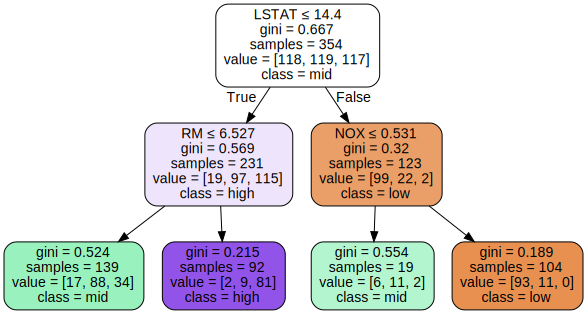

In [168]:
decTreeClf = tree.DecisionTreeClassifier(max_depth=highest_score_depth)
decTreeClf = decTreeClf.fit(colx_train, coly_train)
dot_data = tree.export_graphviz(decTreeClf, out_file=None, 
                     feature_names=load_boston().feature_names,  
                      class_names=['low','mid','high'],  
                      filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 